IMPORTACIÓN DE LIBRERIAS:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

CARGA DE DATASET:

In [2]:
# Leer el archivo JSON y crear un DataFrame
df = pd.read_json('C:/Users/aleja/OneDrive/Escritorio/Data Science/2. Labs/PI1 - MLOPS/Dataset/PI MLOps - STEAM/TRANSFORMACIONES/json/steam_games.json', lines=True)

In [3]:
df

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
1,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
2,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
3,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
4,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120440,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"[Strategy, Indie, Casual, Simulation]",http://steamcommunity.com/app/773640/reviews/?...,"[Single-player, Steam Achievements]",1.99,0.0,773640.0,"Nikita ""Ghost_RUS"""
120441,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"[Strategy, Indie, Casual]",http://steamcommunity.com/app/733530/reviews/?...,"[Single-player, Steam Achievements, Steam Clou...",4.99,0.0,733530.0,Sacada
120442,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,0.0,610660.0,Laush Dmitriy Sergeevich
120443,SIXNAILS,"[Casual, Indie]",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",http://steamcommunity.com/app/658870/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",4.99,0.0,658870.0,"xropi,stev3ns"


1. CHEQUEO DE NULOS

In [4]:
# 1. Chequeo de nulos
def check_missing_values(df):
    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100
    missing_df = pd.DataFrame({'Valores nulos': missing_values, 'Porcentaje': missing_percentage})
    return missing_df[missing_df['Valores nulos'] > 0]

In [5]:
# Mostrar valores nulos
missing_values = check_missing_values(df)
print("Valores nulos:\n", missing_values)

Valores nulos:
               Valores nulos  Porcentaje
publisher             96362   80.004982
genres                91593   76.045498
app_name              88312   73.321433
title                 90360   75.021794
url                   88310   73.319773
release_date          90377   75.035909
tags                  88473   73.455104
reviews_url           88312   73.321433
specs                 88980   73.876043
price                 89687   74.463033
early_access          88310   73.319773
id                    88312   73.321433
developer             91609   76.058782


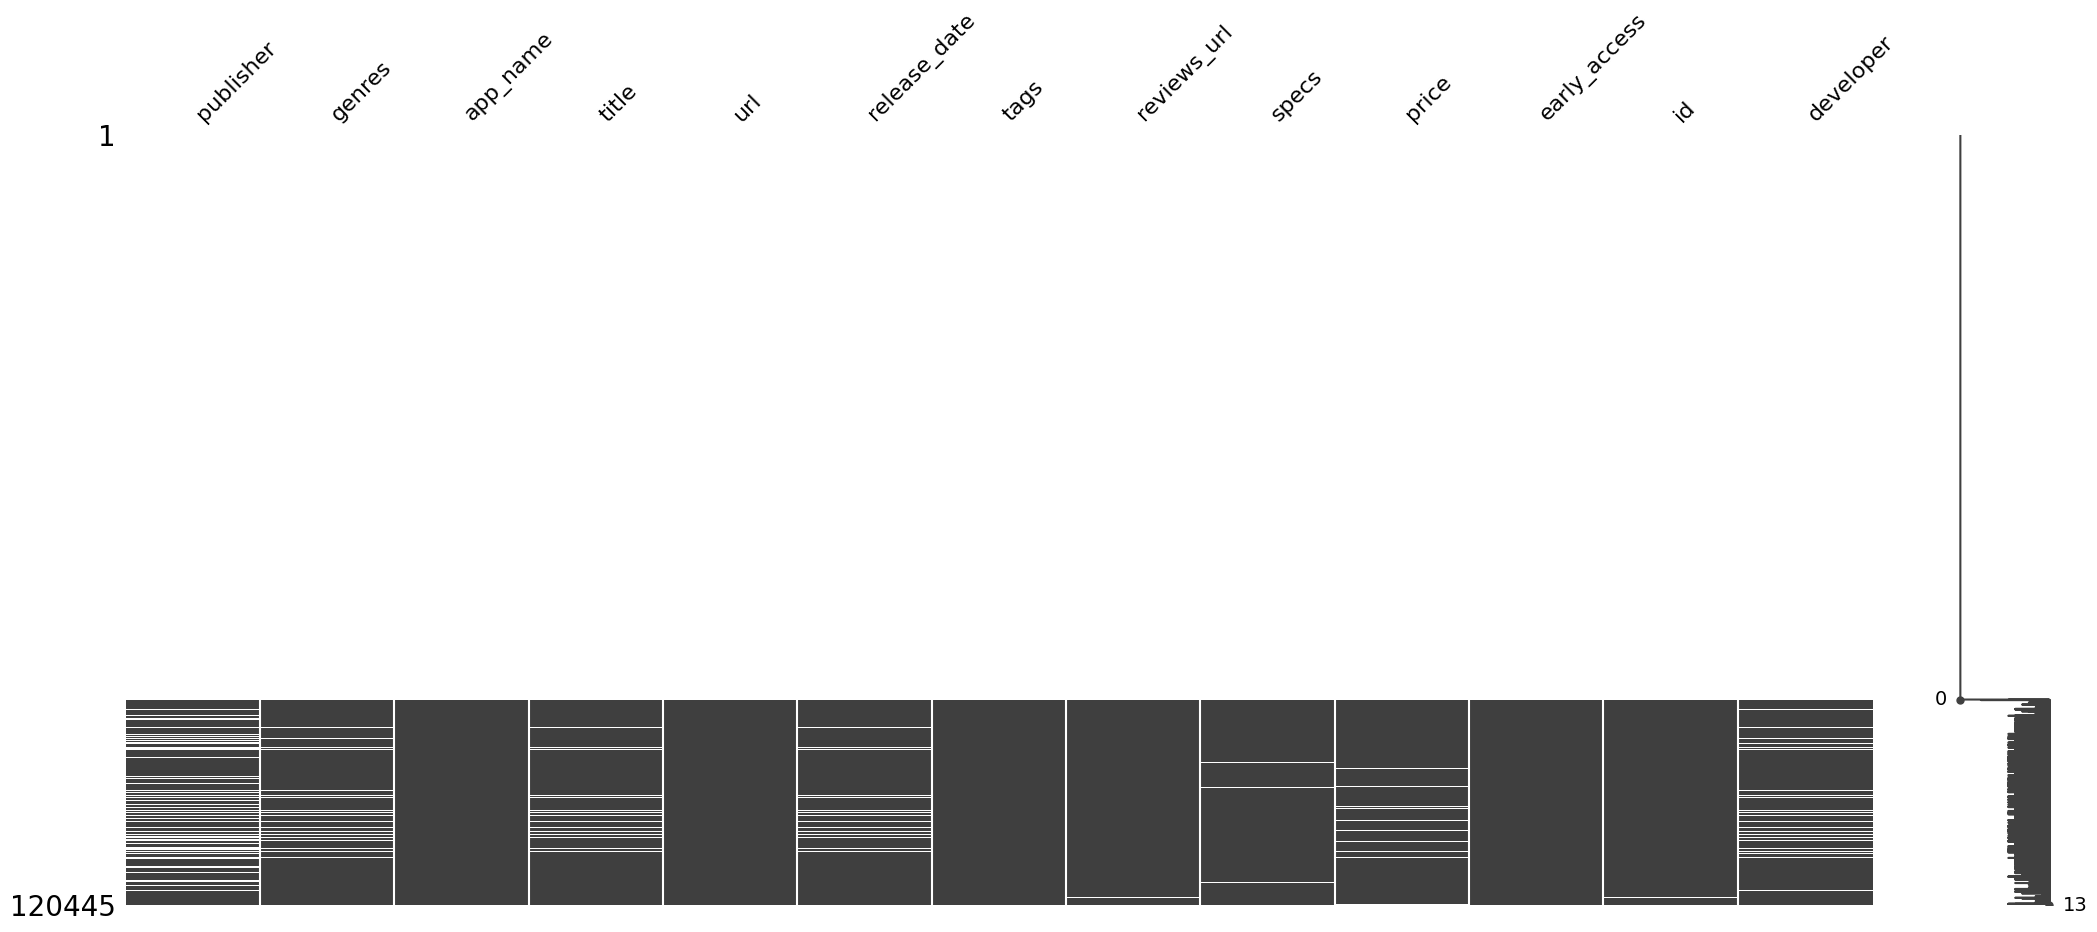

In [6]:
# Visualización de valores nulos
msno.matrix(df)
plt.show()

2. VALORES DUPLICADOS

In [7]:
# 2. Valores duplicados
def check_duplicates(df):
    # Considerar solo columnas que no sean listas para encontrar duplicados
    hashable_columns = [col for col in df.columns if df[col].apply(lambda x: isinstance(x, list)).sum() == 0]
    duplicates = df.duplicated(subset=hashable_columns).sum()
    return duplicates

In [8]:
# Mostrar valores duplicados
duplicates = check_duplicates(df)
print(f"Valores duplicados: {duplicates}")

Valores duplicados: 88309


3. TIPOS DE DATOS

In [9]:
# 3. Tipos de datos
def check_data_types(df):
    data_types = df.dtypes
    return data_types

In [10]:
# Mostrar tipos de datos
data_types = check_data_types(df)
print("Tipos de datos:\n", data_types)

Tipos de datos:
 publisher        object
genres           object
app_name         object
title            object
url              object
release_date     object
tags             object
reviews_url      object
specs            object
price            object
early_access    float64
id              float64
developer        object
dtype: object


4. ANALISIS ESTADISTICO DE DATOS

In [11]:
# 4. Análisis estadístico de datos
def statistical_analysis(df):
    stats = df.describe(include='all')
    return stats

In [12]:
# Mostrar análisis estadístico
stats = statistical_analysis(df)
print("Análisis estadístico:\n", stats)

Análisis estadístico:
        publisher    genres    app_name       title  \
count      24083     28852       32133       30085   
unique      8239       883       32094       30054   
top      Ubisoft  [Action]  Soundtrack  Soundtrack   
freq         385      1880           3           3   
mean         NaN       NaN         NaN         NaN   
std          NaN       NaN         NaN         NaN   
min          NaN       NaN         NaN         NaN   
25%          NaN       NaN         NaN         NaN   
50%          NaN       NaN         NaN         NaN   
75%          NaN       NaN         NaN         NaN   
max          NaN       NaN         NaN         NaN   

                                                      url release_date  \
count                                               32135        30068   
unique                                              32135         3582   
top     http://store.steampowered.com/app/761140/Lost_...   2012-10-16   
freq                            

5. ANALISIS DE CORRELACIONES

In [13]:
# Preparar los datos para el análisis de correlaciones
# Utilizar explode para expandir la lista en filas separadas
df = df.explode('genres')

In [14]:
df

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
1,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
2,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
3,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
4,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120442,Laush Studio,Racing,Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,0.0,610660.0,Laush Dmitriy Sergeevich
120442,Laush Studio,Simulation,Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,0.0,610660.0,Laush Dmitriy Sergeevich
120443,SIXNAILS,Casual,EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",http://steamcommunity.com/app/658870/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",4.99,0.0,658870.0,"xropi,stev3ns"
120443,SIXNAILS,Indie,EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",http://steamcommunity.com/app/658870/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",4.99,0.0,658870.0,"xropi,stev3ns"


In [15]:
# Eliminar las columnas no deseadas
df = df.drop(columns=['url', 'tags', 'reviews_url', 'specs'])

In [16]:
df

,publisher,genres,app_name,title,release_date,price,early_access,id,developer
0,None,None,None,None,None,None,NaN,NaN,None
1,None,None,None,None,None,None,NaN,NaN,None
2,None,None,None,None,None,None,NaN,NaN,None
3,None,None,None,None,None,None,NaN,NaN,None
4,None,None,None,None,None,None,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...
120442,Laush Studio,Racing,Russian Roads,Russian Roads,2018-01-04,1.99,0.0,610660.0,Laush Dmitriy Sergeevich
120442,Laush Studio,Simulation,Russian Roads,Russian Roads,2018-01-04,1.99,0.0,610660.0,Laush Dmitriy Sergeevich
120443,SIXNAILS,Casual,EXIT 2 - Directions,EXIT 2 - Directions,2017-09-02,4.99,0.0,658870.0,"xropi,stev3ns"
120443,SIXNAILS,Indie,EXIT 2 - Directions,EXIT 2 - Directions,2017-09-02,4.99,0.0,658870.0,"xropi,stev3ns"


In [17]:
# Tomar una muestra del dataset para evitar problemas de memoria
df_sample = df.sample(n=1000, random_state=1)

In [18]:
# 5. Análisis de correlaciones
def correlation_analysis(df):
    df_encoded = df.copy()
    
    # Llenar valores nulos en columnas numéricas con la mediana
    num_columns = df_encoded.select_dtypes(include=[np.number]).columns
    df_encoded[num_columns] = df_encoded[num_columns].fillna(df_encoded[num_columns].median())

    # Convertir las columnas categóricas a variables dummy, asegurando que todas las categóricas se incluyan
    categorical_columns = df_encoded.select_dtypes(include=[object, 'category']).columns
    df_encoded = pd.get_dummies(df_encoded, columns=categorical_columns, drop_first=True)

    # Calcular la matriz de correlación
    corr = df_encoded.corr()
    return corr

In [19]:
# Mostrar análisis de correlaciones
correlations = correlation_analysis(df_sample)
print("Análisis de correlaciones:\n", correlations)

Análisis de correlaciones:
                                    early_access        id  publisher_2K  \
early_access                           1.000000  0.036321     -0.006025   
id                                     0.036321  1.000000     -0.025413   
publisher_2K                          -0.006025 -0.025413      1.000000   
publisher_30/30                       -0.006025 -0.045571     -0.001001   
publisher_5 Lives Studios             -0.006025 -0.051950     -0.001001   
...                                         ...       ...           ...   
developer_lalalaZero,Urbanoff         -0.006025  0.070795     -0.001001   
developer_magnussoft                  -0.006025  0.014082     -0.001001   
developer_momoStorm Entertainment      0.166130  0.057674     -0.001001   
developer_oblomysh,EHTechnology       -0.008526  0.073050     -0.001416   
developer_大谷 DGSpitzer                -0.006025  0.051224     -0.001001   

                                   publisher_30/30  publisher_5 Lives S

c:\Users\aleja\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 32043 (\N{CJK UNIFIED IDEOGRAPH-7D2B}) missing from current font.
  fig.canvas.draw()
C:\Users\aleja\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32043 (\N{CJK UNIFIED IDEOGRAPH-7D2B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


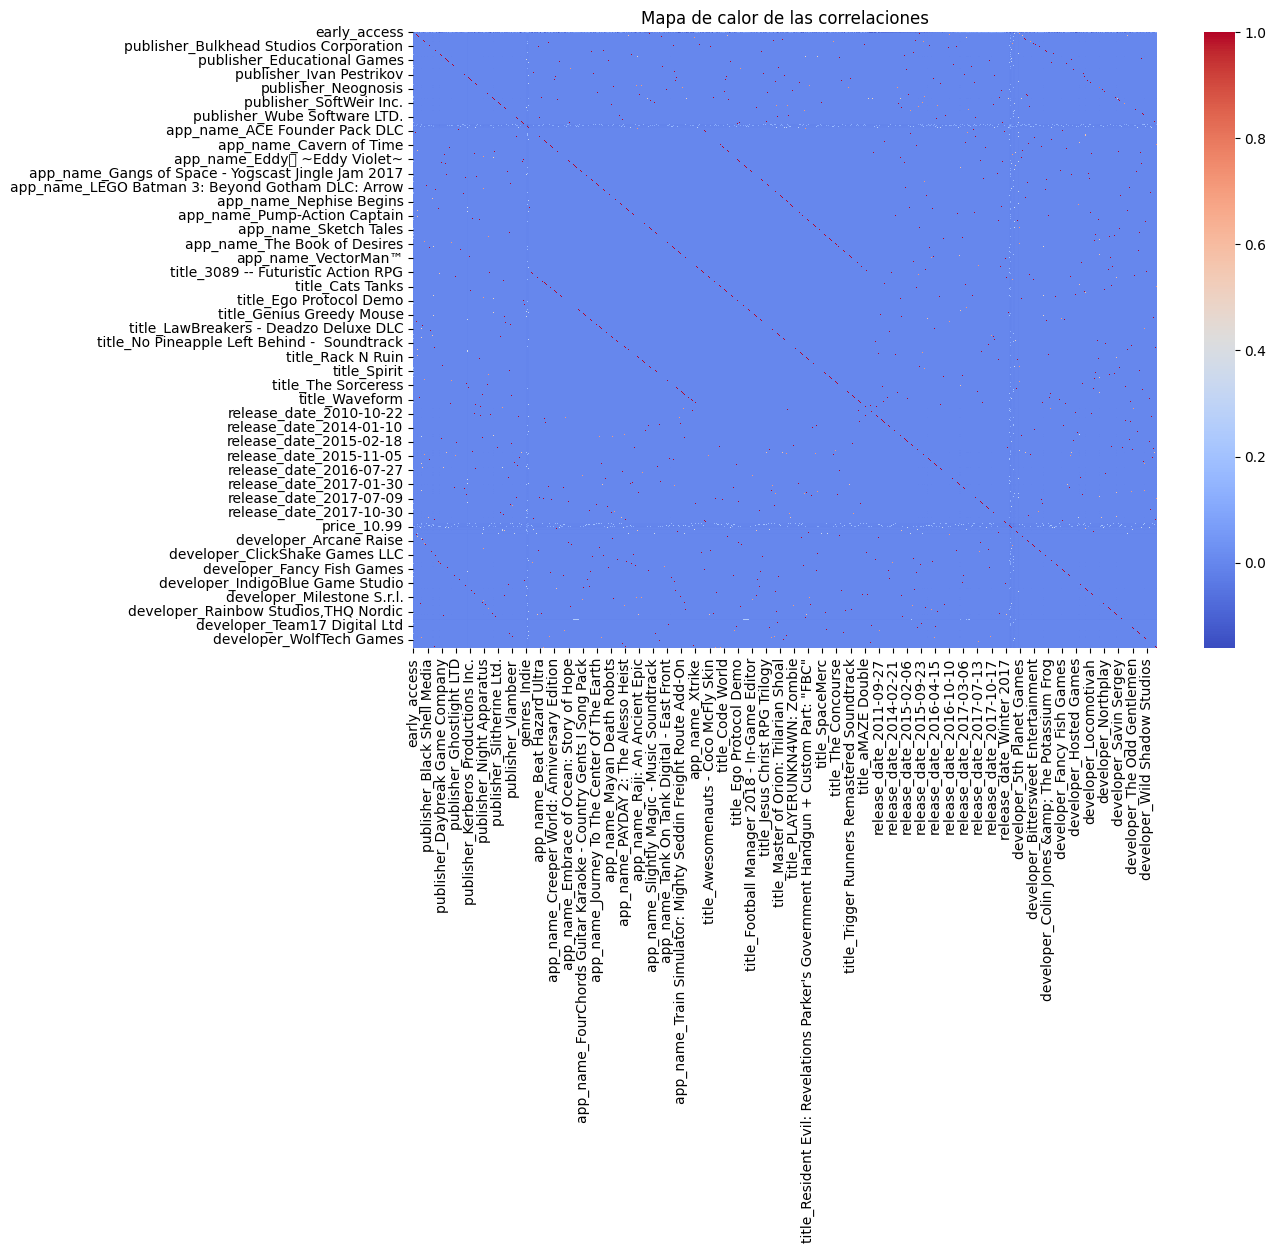

In [20]:
# Mostrar el mapa de calor de las correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(correlations, annot=False, cmap='coolwarm')
plt.title("Mapa de calor de las correlaciones")
plt.show()

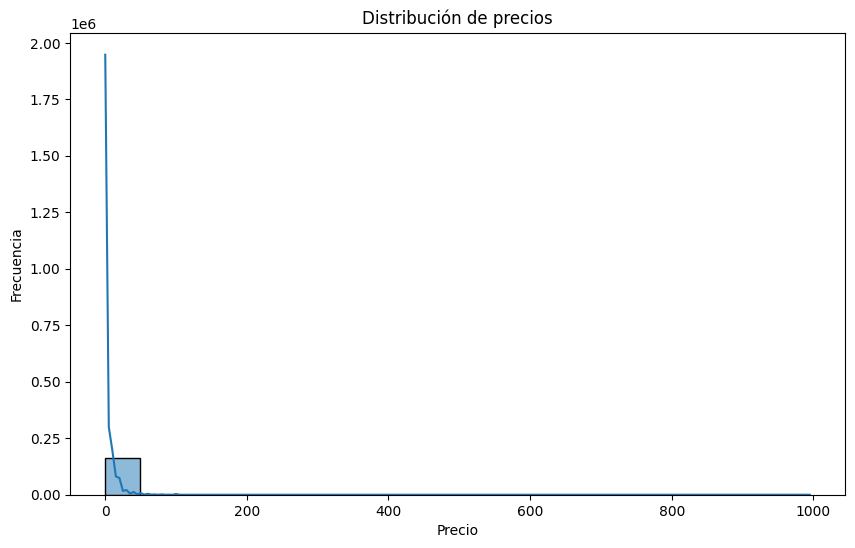

In [22]:
# Análisis visual adicional (Opcional)
# Histograma de precios
# Convertir la columna 'price' a numérico, reemplazando las cadenas con NaN y luego con 0, usando .loc para evitar SettingWithCopyWarning
df.loc[:, 'price'] = pd.to_numeric(df['price'], errors='coerce').fillna(0)
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=20, kde=True)
plt.title("Distribución de precios")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()

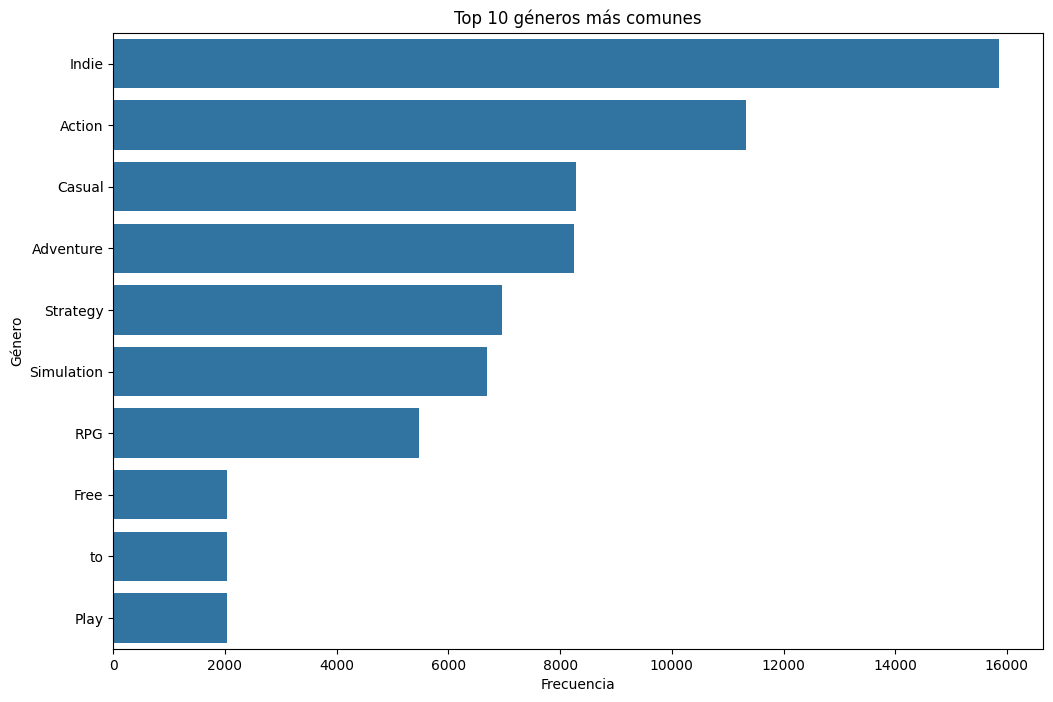

In [23]:
# Gráfico de barras de géneros más comunes
plt.figure(figsize=(12, 8))
df['genres'] = df['genres'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
genres_split = df['genres'].str.split(expand=True).stack().value_counts()
sns.barplot(x=genres_split.values[:10], y=genres_split.index[:10])
plt.title("Top 10 géneros más comunes")
plt.xlabel("Frecuencia")
plt.ylabel("Género")
plt.show()